# Project 1 - Group 72
### Matteo Boglioni - Federica Bruni - Paula Momo Cabrera

## Part 1

### Import Libraries and Data

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
train_df = pd.read_csv("datasets/heart_failure/train_val_split.csv")
test_df = pd.read_csv("datasets/heart_failure/test_split.csv")

### Q1

In [146]:
train_df = train_df[train_df["Cholesterol"]> 0]
train_df['ExerciseAngina'] = train_df['ExerciseAngina'].map({'Y': 1, 'N': 0})
train_raw = train_df.to_numpy()
test_raw = test_df.to_numpy()

In [147]:
print(train_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     37   M           ATA        130          283          0         ST   
2     48   F           ASY        138          214          0     Normal   
3     54   M           NAP        150          195          0     Normal   
4     39   M           NAP        120          339          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
729   41   M           ATA        120          157          0     Normal   
730   57   F           ASY        140          241          0     Normal   
731   45   M            TA        110          264          0     Normal   
732   68   M           ASY        144          193          1     Normal   
733   57   M           ASY        130          131          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0

| Variable          | Explanation   | 
|:-----------------:|:-------------:|
|  Age              |  Intituively, with age progression follows higher risks               |
|  Sex              |  Male population is generally more sensible to heart diseases         |
|  ChestPainType    |  TA: typical angina, classic chest pain. <br> ATA: atypical angina.<br>      NAP: non-anginal pain <br> ASY: asymptomatic,common for diabetes patients to be  <br> asymptomatic even during heart attacks (due to neuropathy)|
|  RestingBP        |  Resting BloodPressure, symptom of hypertension if too high. Increases stroke risks       |
|  Cholesterol      |  High cholesterol levels increase predisposition to atherosclerosis-->leads to ACS        |
|  FastingBS        |  Fasting blood sugar, over 126 it's automatically a diagnose of diabetes                  |
|  RestingECG       |  Normal: all looks good. ST: potential disturbances in rhythm, LVH: left ventricle hypertrophy.|
|  MaxHR            |  Higher heart rates can be symptom of heart failure                                       |
|  ExerciseAngina   |  Angina during exercise, symptom of ischemia                                              |
|  Oldpeak          |  ST depression induced by exercise relative to rest                                       |
|  ST_Slope         |               |

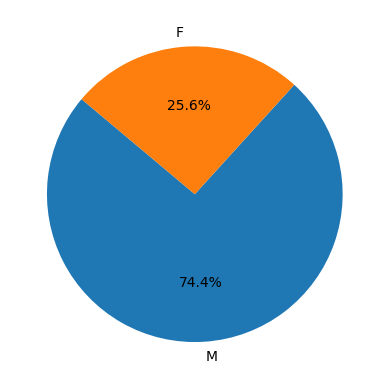

In [148]:
sex_counts = train_df['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

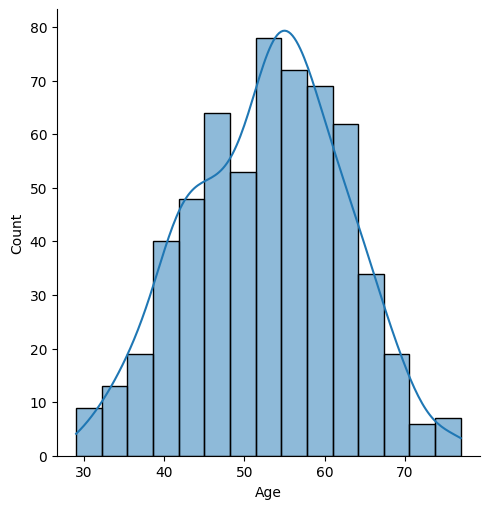

In [149]:
ax=sns.displot(train_raw[:, 0], kde=True, bins=15,)
ax.set(xlabel='Age', ylabel="Count")
plt.show()

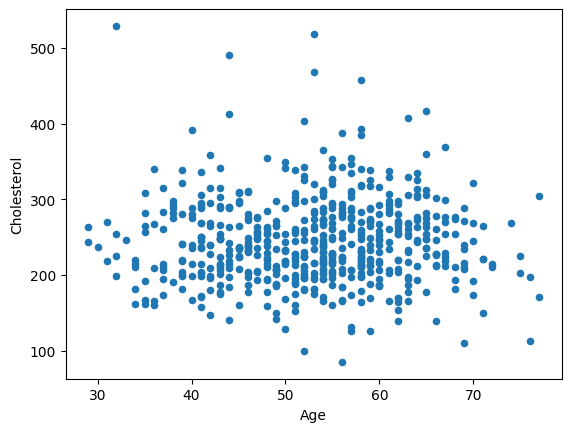

In [150]:
train_df.plot(kind = 'scatter', x = 'Age', y = 'Cholesterol')
plt.show() 


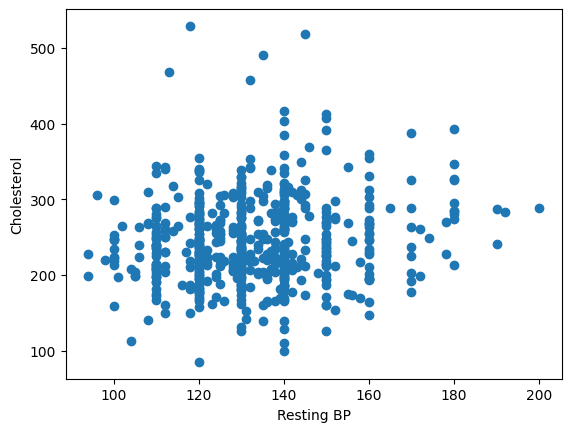

In [151]:
plt.scatter(x=train_raw[:,3], y=train_raw[:,4], )
plt.xlabel("Resting BP")
plt.ylabel("Cholesterol")
plt.show()

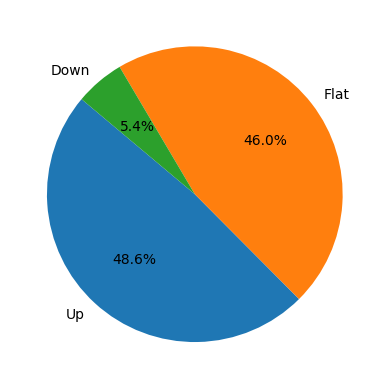

In [152]:
st_slope = train_df['ST_Slope'].value_counts()
plt.pie(st_slope, labels=st_slope.index, autopct='%1.1f%%', startangle=140)
plt.show()

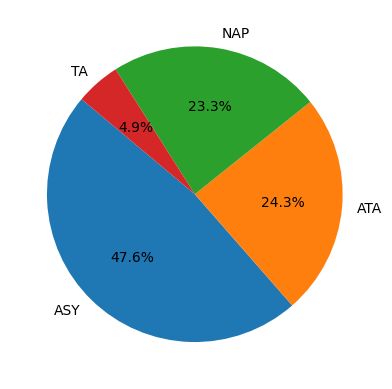

In [153]:
chest_pain = train_df['ChestPainType'].value_counts()
plt.pie(chest_pain , labels=chest_pain.index, autopct='%1.1f%%', startangle=140)
plt.show()

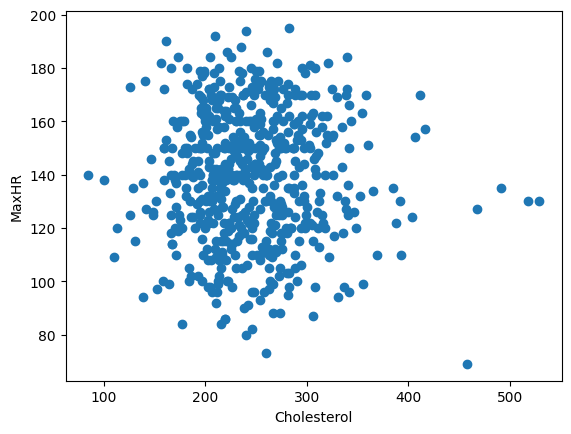

In [154]:
plt.scatter(x=train_raw[:,4], y=train_raw[:,7], )
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")
plt.show()

### Q2

In [155]:
from sklearn.preprocessing import LabelEncoder
train_df['Sex'] = train_df['Sex'].map({"M": 1, "F": 0})
chest_pain_encoder = LabelEncoder()
train_df['ChestPainType'] = chest_pain_encoder.fit_transform(train_df['ChestPainType'])
resting_ecg_encoder = LabelEncoder()
train_df['RestingECG'] = resting_ecg_encoder.fit_transform(train_df['RestingECG'])
st_slope_encoder = LabelEncoder()
train_df['ST_Slope'] = st_slope_encoder.fit_transform(train_df['ST_Slope'])

print(train_df)
train_raw = train_df.to_numpy()
test_raw = test_df.to_numpy()

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     37    1              1        130          283          0           2   
2     48    0              0        138          214          0           1   
3     54    1              2        150          195          0           1   
4     39    1              2        120          339          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
729   41    1              1        120          157          0           1   
730   57    0              0        140          241          0           1   
731   45    1              3        110          264          0           1   
732   68    1              0        144          193          1           1   
733   57    1              0        130          131          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [156]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_raw[:, :11], train_raw[:,11])







Lasso(alpha=0.1)